In [1]:
import numpy as np
import os

from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.config import ExportFormat
from tflite_model_maker import model_spec
from tflite_model_maker import object_detector

import tensorflow as tf
assert tf.__version__.startswith('2')

tf.get_logger().setLevel('ERROR')
from absl import logging
logging.set_verbosity(logging.ERROR)

In [2]:
spec = model_spec.get('efficientdet_lite3')

In [3]:
train_data, validation_data, test_data = object_detector.DataLoader.from_csv('all-jpg.csv')

In [7]:
model = object_detector.create(train_data, model_spec=spec, batch_size=10, epochs= 15, train_whole_model=True, validation_data=validation_data)

Epoch 1/15
58/58 [==============================] - 720s 11s/step - det_loss: 1.7145 - cls_loss: 1.2078 - box_loss: 0.0101 - reg_l2_loss: 0.0961 - loss: 1.8106 - learning_rate: 0.0102 - gradient_norm: 1.0490 - val_det_loss: 1.6449 - val_cls_loss: 1.3892 - val_box_loss: 0.0051 - val_reg_l2_loss: 0.0961 - val_loss: 1.7410
Epoch 2/15
58/58 [==============================] - 633s 11s/step - det_loss: 1.2737 - cls_loss: 1.0176 - box_loss: 0.0051 - reg_l2_loss: 0.0962 - loss: 1.3698 - learning_rate: 0.0121 - gradient_norm: 1.8108 - val_det_loss: 1.6592 - val_cls_loss: 1.5511 - val_box_loss: 0.0022 - val_reg_l2_loss: 0.0962 - val_loss: 1.7554
Epoch 3/15
58/58 [==============================] - 631s 11s/step - det_loss: 1.0572 - cls_loss: 0.8430 - box_loss: 0.0043 - reg_l2_loss: 0.0962 - loss: 1.1533 - learning_rate: 0.0115 - gradient_norm: 2.0477 - val_det_loss: 1.4163 - val_cls_loss: 1.3254 - val_box_loss: 0.0018 - val_reg_l2_loss: 0.0962 - val_loss: 1.5125
Epoch 4/15
58/58 [================

In [8]:
model.evaluate(test_data)

5/5 [==============================] - 136s 18s/step



{'AP': 0.24849428,
 'AP50': 0.38133562,
 'AP75': 0.29663485,
 'APs': -1.0,
 'APm': -1.0,
 'APl': 0.2484944,
 'ARmax1': 0.1856648,
 'ARmax10': 0.4470966,
 'ARmax100': 0.5804091,
 'ARs': -1.0,
 'ARm': -1.0,
 'ARl': 0.5804091,
 'AP_/class': -1.0,
 'AP_/closebracket': 0.44759366,
 'AP_/div': 0.3703583,
 'AP_/equal': 0.2650844,
 'AP_/lessthan': 0.4629489,
 'AP_/lessthan-equal': 0.2346981,
 'AP_/min': 0.15054086,
 'AP_/morethan': 0.4426417,
 'AP_/morethan-equal': 0.37997106,
 'AP_/multi': 0.001244727,
 'AP_/num0': 0.0005778065,
 'AP_/num1': 0.24546993,
 'AP_/num2': 0.17201804,
 'AP_/num3': 0.24227212,
 'AP_/num4': 0.25445098,
 'AP_/num5': 0.1305836,
 'AP_/num6': 0.2831301,
 'AP_/num7': 0.31261277,
 'AP_/num8': 0.2009699,
 'AP_/num9': 0.12248468,
 'AP_/openbracket': 0.49385098,
 'AP_/sum': 0.0048772856}

In [9]:
model.export(export_dir='.')

In [10]:
model.evaluate_tflite('model.tflite', test_data)

303/303 [==============================] - 9368s 31s/step



{'AP': 0.2084177,
 'AP50': 0.32055467,
 'AP75': 0.2471354,
 'APs': -1.0,
 'APm': -1.0,
 'APl': 0.2084177,
 'ARmax1': 0.13683283,
 'ARmax10': 0.32535073,
 'ARmax100': 0.4195182,
 'ARs': -1.0,
 'ARm': -1.0,
 'ARl': 0.4195182,
 'AP_/class': -1.0,
 'AP_/closebracket': 0.4385617,
 'AP_/div': 0.40579337,
 'AP_/equal': 0.25389382,
 'AP_/lessthan': 0.46269354,
 'AP_/lessthan-equal': 0.23339336,
 'AP_/min': 0.14595152,
 'AP_/morethan': 0.45942461,
 'AP_/morethan-equal': 0.17421229,
 'AP_/multi': 0.0009842055,
 'AP_/num0': 5.50055e-05,
 'AP_/num1': 0.235533,
 'AP_/num2': 0.20197064,
 'AP_/num3': 0.17246589,
 'AP_/num4': 0.17173456,
 'AP_/num5': 0.11492603,
 'AP_/num6': 0.23586471,
 'AP_/num7': 0.27849418,
 'AP_/num8': 0.19744527,
 'AP_/num9': 0.103003226,
 'AP_/openbracket': 0.089108914,
 'AP_/sum': 0.0012617519}

In [11]:
#@title Load the trained TFLite model and define some visualization functions

import cv2

from PIL import Image

model_path = 'model.tflite'

# Load the labels into a list
classes = ['num0','num1','num2','num3','num4','num5','num6','num7','num8','num9','sum','min','div','multi','equal','openbracket','closebracket',
'morethan','lessthan','morethan-equal','lessthan-equal'] * model.model_spec.config.num_classes

label_map = model.model_spec.config.label_map
for label_id, label_name in label_map.as_dict().items():
  classes[label_id-1] = label_name

# Define a list of colors for visualization
COLORS = np.random.randint(0, 255, size=(len(classes), 3), dtype=np.uint8)

def preprocess_image(image_path, input_size):
  """Preprocess the input image to feed to the TFLite model"""
  img = tf.io.read_file(image_path)
  img = tf.io.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.uint8)
  original_image = img
  resized_img = tf.image.resize(img, input_size)
  resized_img = resized_img[tf.newaxis, :]
  resized_img = tf.cast(resized_img, dtype=tf.uint8)
  return resized_img, original_image


def detect_objects(interpreter, image, threshold):
  """Returns a list of detection results, each a dictionary of object info."""

  signature_fn = interpreter.get_signature_runner()

  # Feed the input image to the model
  output = signature_fn(images=image)

  # Get all outputs from the model
  count = int(np.squeeze(output['output_0']))
  scores = np.squeeze(output['output_1'])
  classes = np.squeeze(output['output_2'])
  boxes = np.squeeze(output['output_3'])

  results = []
  for i in range(count):
    if scores[i] >= threshold:
      result = {
        'bounding_box': boxes[i],
        'class_id': classes[i],
        'score': scores[i]
      }
      results.append(result)
  return results


def run_odt_and_draw_results(image_path, interpreter, threshold=0.5):
  """Run object detection on the input image and draw the detection results"""
  # Load the input shape required by the model
  _, input_height, input_width, _ = interpreter.get_input_details()[0]['shape']

  # Load the input image and preprocess it
  preprocessed_image, original_image = preprocess_image(
      image_path,
      (input_height, input_width)
    )

  # Run object detection on the input image
  results = detect_objects(interpreter, preprocessed_image, threshold=threshold)

  # Plot the detection results on the input image
  original_image_np = original_image.numpy().astype(np.uint8)
  for obj in results:
    # Convert the object bounding box from relative coordinates to absolute
    # coordinates based on the original image resolution
    ymin, xmin, ymax, xmax = obj['bounding_box']
    xmin = int(xmin * original_image_np.shape[1])
    xmax = int(xmax * original_image_np.shape[1])
    ymin = int(ymin * original_image_np.shape[0])
    ymax = int(ymax * original_image_np.shape[0])

    # Find the class index of the current object
    class_id = int(obj['class_id'])

    # Draw the bounding box and label on the image
    color = [int(c) for c in COLORS[class_id]]
    cv2.rectangle(original_image_np, (xmin, ymin), (xmax, ymax), color, 2)
    # Make adjustments to make the label visible for all objects
    y = ymin - 15 if ymin - 15 > 15 else ymin + 15
    label = "{}: {:.0f}%".format(classes[class_id], obj['score'] * 100)
    cv2.putText(original_image_np, label, (xmin, y),
        cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

  # Return the final image
  original_uint8 = original_image_np.astype(np.uint8)
  return original_uint8

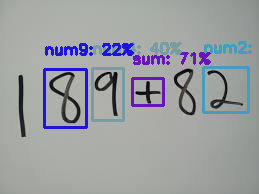

In [25]:
#@title Run object detection and show the detection results

# INPUT_IMAGE_URL = "test.jpeg" #@param {type:"string"}
DETECTION_THRESHOLD = 0.2 #@param {type:"number"}

TEMP_FILE = 'test/test10.jpg'

# !wget -q -O $TEMP_FILE $INPUT_IMAGE_URL
im = Image.open(TEMP_FILE)
im.thumbnail((512, 512), Image.ANTIALIAS)
im.save(TEMP_FILE, 'PNG')

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Run inference and draw detection result on the local copy of the original file
detection_result_image = run_odt_and_draw_results(
    TEMP_FILE,
    interpreter,
    threshold=DETECTION_THRESHOLD
)

# Show the detection result
Image.fromarray(detection_result_image)